In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from pyod.models.knn import KNN
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [324]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,Хронологический возраст,Адрес,Долгота,Широта,pca(координата),Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,54,"Кировская область, Киров, ул. Некрасова, 53",49.628919,58.583420,0.011685,2850000,14.862830,63758.389262,стандарт,1
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,63,"Кировская область, Киров, Октябрьский пр-т, 8",49.616819,58.638089,0.029066,2100000,14.557448,65625.000000,стандарт,1
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,9,"Кировская область, Киров, село Макарье, Проезж...",49.751737,58.612207,-0.107734,2950000,14.897316,88855.421687,стандарт,1
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,46,"Кировская область, Киров, ул. Карла Маркса, 47",49.667376,58.606375,-0.024346,4450000,15.308415,86240.310078,стандарт,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,2,"Кировская область, Киров, ул. Ивана Попова, 38",49.631758,58.575974,0.008132,5380000,15.498199,98715.596330,стандарт,1


In [325]:
df_1 = df.copy()

In [326]:
#КОМНАТНОСТЬ
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Комнатность']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,0,1,2,3,4
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [327]:
# переименнуе столбцы
df_1 = df_1.rename({0: '1к', 1: '2к', 2: '3к', 3: '4к и более', 4: 'студия'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [328]:
#ЭТАЖ
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Этаж 2']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,0,1,2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [329]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'первый', 1: 'последний', 2: 'средний'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,первый,последний,средний
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [330]:
#МАТЕРИАЛ СТЕН
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Материал стен']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [331]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'деревянный', 1: 'кирпичный', 2: 'монолитный', 3: 'панельный'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,деревянный,кирпичный,монолитный,панельный
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [332]:
#СОСТОЯНИЕ ОТДЕЛКИ
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Ремонт']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [333]:
df_1 = df_1.rename({0: 'дизайнерский', 1: 'евро', 2: 'косметический', 3: 'требует ремонта'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [334]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Квартиры_Киров_выбока_2.xlsx')
df_1.to_excel(writer, 'marks')
writer.save()

In [335]:
df_1.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2', '1к', '2к', '3к', '4к и более',
       'студия', 'первый', 'последний', 'средний', 'деревянный', 'кирпичный',
       'монолитный', 'панельный', 'дизайнерский', 'евро', 'косметический',
       'требует ремонта'],
      dtype='object')

1. Выборка 1 - без исключения выбросов (с учетом нормализации и стандартизации).
2. Выборка 2 - исключение экстремальных выбросов.
3. Выборка 3 - исключение выбросов по общей площади и цене.
4. Выборка 4 - исключение выбросов по логарифмированным общей площади и цене.
5. Выборка 5 - исключение выбросов алгоритмом KNN.

<font size = 3><div style="text-align: justify">**Выборка 1:**</div></font>

In [336]:
df_v1 = df_1.copy()
len(df_v1)

2399

In [220]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 16, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.816
Test R2 0.785
MAE train: 0.2
MAE test: 0.2


In [221]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
           '1к', '2к', '3к', 'студия', '4к и более', 'первый', 'последний', 'средний', 
           'деревянный', 'панельный', 'кирпичный', 'монолитный',
           'евро', 'косметический', 'требует ремонта', 'дизайнерский']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 12, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.729
Test R2 0.651
MAE train: 0.2
MAE test: 0.2


In [222]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Хронологический возраст', 'Долгота', 'Широта', 
           'первый', 'последний', 'средний', 
           'деревянный', 'панельный', 'кирпичный', 'монолитный',
           'евро', 'косметический', 'требует ремонта', 'дизайнерский']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 12, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.621
Test R2 0.487
MAE train: 0.2
MAE test: 0.3


In [223]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [224]:
mms_1 = MinMaxScaler()
mms_1.fit(X_train)

MinMaxScaler()

In [225]:
X_train_norm = pd.DataFrame(mms_1.transform(X_train), columns = X_train.columns)
X_train_norm

,LN(Общая площадь),Площадь кухни,Жилая площадь,Этаж 1,Этажей в доме,Хронологический возраст,Долгота,Широта,pca(координата),Тип санузла 2,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,0.321601,0.120339,0.144114,0.208333,0.192308,0.008130,0.463000,0.521013,0.544358,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.393474,0.162712,0.159212,0.333333,0.576923,0.056911,0.641526,0.460025,0.358791,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.327579,0.118644,0.146658,0.625000,0.576923,0.048780,0.728879,0.970162,0.289881,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.595217,0.101695,0.540900,0.166667,0.346154,0.276423,0.527209,0.652693,0.483843,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.297608,0.067797,0.165300,0.083333,0.307692,0.341463,0.600084,0.695905,0.410855,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,0.399067,0.067797,0.258771,0.000000,0.153846,0.504065,0.604217,0.496566,0.398537,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1915,0.463523,0.118644,0.302902,0.375000,0.346154,0.097561,0.719383,0.536968,0.282060,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1916,0.165915,0.084746,0.085182,0.250000,0.307692,0.276423,0.679742,0.712538,0.329832,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1917,0.592608,0.179661,0.512270,0.375000,0.615385,0.081301,0.637688,0.440757,0.361947,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [226]:
X_test_norm = pd.DataFrame(mms_1.transform(X_test), columns = X_test.columns)
X_test_norm

,LN(Общая площадь),Площадь кухни,Жилая площадь,Этаж 1,Этажей в доме,Хронологический возраст,Долгота,Широта,pca(координата),Тип санузла 2,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,0.252376,0.080791,0.126077,0.041667,0.153846,0.284553,0.220679,0.186167,0.779308,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.585100,0.254237,0.453133,0.375000,0.576923,0.016260,0.723854,0.992121,0.295925,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.813787,0.203390,0.997466,0.125000,0.153846,0.178862,0.731906,0.676964,0.274891,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.417544,0.067797,0.298428,0.041667,0.038462,0.479675,0.216504,0.193231,0.783876,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.301910,0.067797,0.165883,0.125000,0.153846,0.414634,0.564576,0.654022,0.445574,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.435734,0.084746,0.311011,0.041667,0.153846,0.439024,0.636719,0.539915,0.366960,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
476,0.683416,0.120339,0.801611,0.083333,0.115385,0.235772,0.711432,0.605058,0.292975,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
477,0.565773,0.118644,0.478251,0.000000,0.307692,0.268293,0.717010,0.700465,0.291122,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
478,0.800712,0.172881,0.994828,0.000000,0.038462,0.707317,0.665381,0.774159,0.347059,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [227]:
knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 12, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train_norm, Y_train)

pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.0f}')
print(f'MAE test: {mae(Y_test, pred_test):.0f}')

Train R2 0.758
Test R2 0.695
MAE train: 0
MAE test: 0


In [337]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [338]:
mms_2 = StandardScaler()
mms_2.fit(X_train)

StandardScaler()

In [339]:
X_train_std = pd.DataFrame(mms_2.transform(X_train), columns = X_train.columns)
X_train_std

,LN(Общая площадь),Площадь кухни,Жилая площадь,Этаж 1,Этажей в доме,Хронологический возраст,Долгота,Широта,pca(координата),Тип санузла 2,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,-0.855906,-0.083902,-0.897183,0.181929,-0.603916,-1.163387,-1.644071,-0.259628,1.611015,0.858284,...,2.09534,-1.410353,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
1,-0.310568,0.367422,-0.810000,0.915378,1.285106,-0.881412,0.029550,-0.572831,-0.070253,0.858284,...,-0.47725,0.709042,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,-0.663845,1.149102,-0.482181
2,-0.810547,-0.101955,-0.882496,2.626759,1.285106,-0.928408,0.848453,2.046995,-0.694594,0.858284,...,2.09534,-1.410353,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,-0.663845,1.149102,-0.482181
3,1.220175,-0.282485,1.394106,-0.062554,0.151693,0.387477,-1.042130,0.416620,1.062738,-1.165115,...,-0.47725,0.709042,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
4,-1.037953,-0.643544,-0.774844,-0.551520,-0.037210,0.763444,-0.358958,0.638536,0.401457,0.858284,...,-0.47725,0.709042,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,-0.268129,-0.643544,-0.235083,-1.040486,-0.792818,1.703362,-0.320211,-0.385173,0.289845,0.858284,...,-0.47725,-1.410353,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
1915,0.220938,-0.101955,0.019756,1.159861,0.151693,-0.646432,0.759439,-0.177691,-0.765452,-1.165115,...,2.09534,-1.410353,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,1.506375,-0.870245,-0.482181
1916,-2.037190,-0.463014,-1.237493,0.426412,-0.037210,0.387477,0.387816,0.723955,-0.332628,0.858284,...,-0.47725,0.709042,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
1917,1.200381,0.547951,1.228780,1.159861,1.474008,-0.740424,-0.006431,-0.671785,-0.041665,-1.165115,...,-0.47725,0.709042,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,1.506375,-0.870245,-0.482181


In [340]:
X_test_std = pd.DataFrame(mms_2.transform(X_test), columns = X_test.columns)
X_test_std

,LN(Общая площадь),Площадь кухни,Жилая площадь,Этаж 1,Этажей в доме,Хронологический возраст,Долгота,Широта,pca(координата),Тип санузла 2,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,-1.381153,-0.505138,-1.001341,-0.796003,-0.792818,0.434473,-3.915752,-1.979241,3.739705,0.858284,...,-0.47725,0.709042,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,1.506375,-0.870245,-0.482181
1,1.143417,1.342281,0.887287,1.159861,1.285106,-1.116391,0.801345,2.159764,-0.639837,-1.165115,...,-0.47725,0.709042,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,1.506375,-0.870245,-0.482181
2,2.878595,0.800692,4.030604,-0.307037,-0.792818,-0.176473,0.876837,0.541267,-0.830403,-1.165115,...,-0.47725,0.709042,-0.112538,-1.356008,3.924501,-0.621740,3.524143,-0.663845,-0.870245,-0.482181
3,-0.127935,-0.643544,-0.006080,-0.796003,-1.359525,1.562375,-3.954892,-1.942962,3.781094,0.858284,...,2.09534,-1.410353,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,-0.870245,2.073911
4,-1.005311,-0.643544,-0.771476,-0.307037,-0.792818,1.186407,-0.691833,0.423444,0.716016,0.858284,...,-0.47725,0.709042,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.010087,-0.463014,0.066587,-0.796003,-0.792818,1.327395,-0.015514,-0.162556,0.003753,0.858284,...,-0.47725,0.709042,-0.112538,-1.356008,-0.254809,1.608389,-0.283757,-0.663845,1.149102,-0.482181
476,1.889396,-0.083902,2.899615,-0.551520,-0.981720,0.152498,0.684895,0.171988,-0.666560,-1.165115,...,-0.47725,0.709042,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,1.149102,-0.482181
477,0.996765,-0.101955,1.032331,-1.040486,-0.037210,0.340481,0.737185,0.661954,-0.683351,0.858284,...,-0.47725,-1.410353,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,-0.870245,2.073911
478,2.779389,0.475739,4.015375,-1.040486,-1.359525,2.878259,0.253180,1.040415,-0.176548,-1.165115,...,-0.47725,-1.410353,-0.112538,0.737459,-0.254809,-0.621740,-0.283757,-0.663845,-0.870245,2.073911


In [341]:
knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 15, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train_std, Y_train)

pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.0f}')
print(f'MAE test: {mae(Y_test, pred_test):.0f}')

Train R2 0.823
Test R2 0.792
MAE train: 0
MAE test: 0


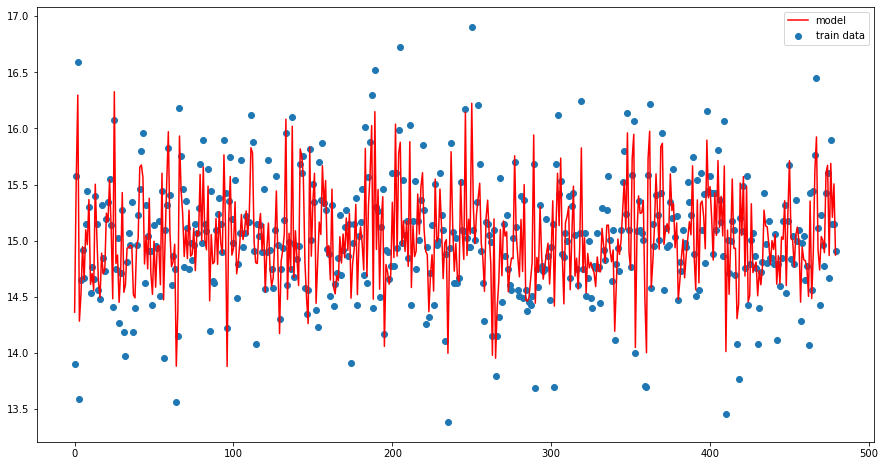

In [342]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [343]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(knn, X_train, Y_train, cv=5)
cv_results

array([0.76776413, 0.79377471, 0.77763849, 0.79707871, 0.77125138])

In [344]:
# среднее значение качества модели
cv_results.mean()

0.7815014833983589

<font size = 3><div style="text-align: justify">**Вывод по выборке 1:**</div></font>

Хорошее качество наблюдается на первоначальной выборке с логарифмированной ценой и логарифмированной общей площадью. Отмечаю, что качество немного улучшается при использовании StandardScaler. Уменьшение количества факторов приводит к ухудшению модели.

<font size = 3><div style="text-align: justify">**Выборка 2:**</div></font>

In [235]:
df_v2 = df_1.copy()
len(df_v2)

2399

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Общая площадь'>

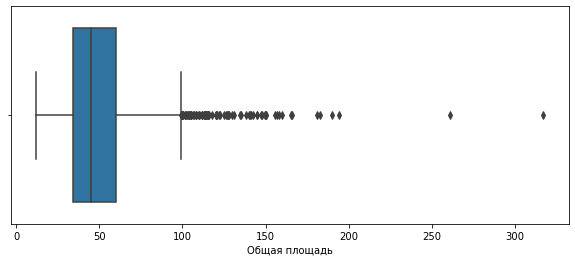

In [236]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['Общая площадь'])

In [237]:
df_v2 = df_1.loc[df_1['Общая площадь'] < 175]
len(df_v2)

2393

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Площадь кухни'>

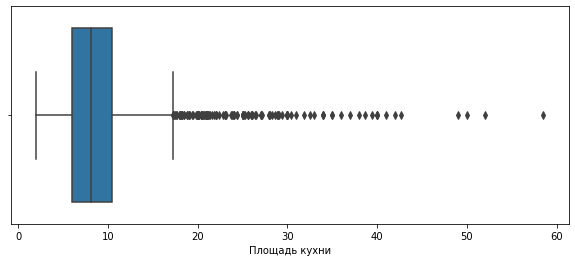

In [238]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['Площадь кухни'])

In [239]:
df_v2 = df_v2.loc[df_1['Площадь кухни'] < 45]
len(df_v2)

2389

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Жилая площадь'>

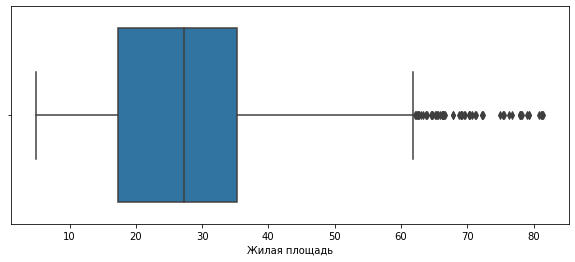

In [240]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['Жилая площадь'])

In [241]:
df_v2 = df_v2.loc[df_1['Жилая площадь'] < 80]
len(df_v2)

2384

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена'>

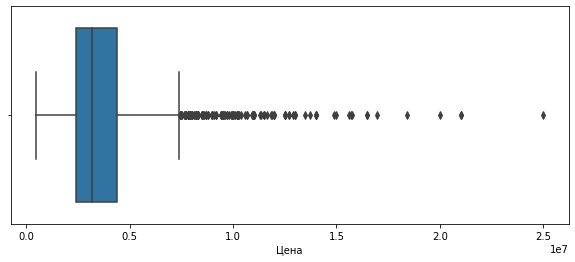

In [242]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['Цена'])

In [243]:
df_v2 = df_v2.loc[df_1['Цена'] < 14800000]
len(df_v2)

2371

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Хронологический возраст'>

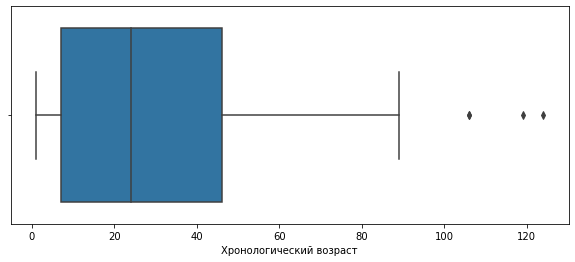

In [244]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['Хронологический возраст'])

In [245]:
df_v2 = df_v2.loc[df_1['Хронологический возраст'] < 100]
len(df_v2)

2367

In [246]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v2[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 10, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.821
Test R2 0.790
MAE train: 0.2
MAE test: 0.2


<font size = 3><div style="text-align: justify">**Вывод по выборке 2:**</div></font>

Исключение экстремальных выбросов из данных не привело к улучшению модели.

<font size = 3><div style="text-align: justify">**Выборка 3:**</div></font>

In [247]:
df_v3 = df_1.copy()
len(df_v3)

2399

In [248]:
df_v3 = df_1.loc[df_1['Общая площадь'] < 90]
df_v3 = df_v3.loc[df_v3['Хронологический возраст'] < 100]
df_v3 = df_v3.loc[df_v3['Цена'] < 6000000]
len(df_v3)

2081

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Площадь кухни'>

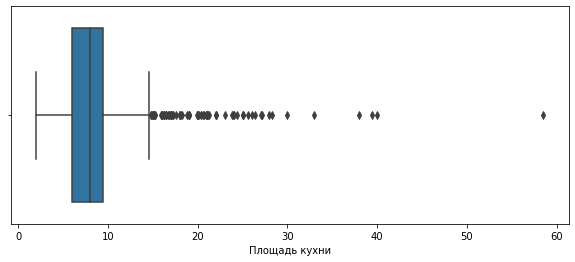

In [249]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v3['Площадь кухни'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Жилая площадь'>

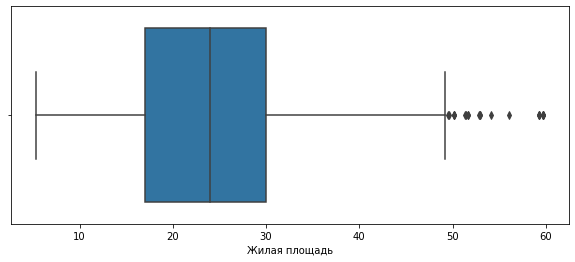

In [250]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v3['Жилая площадь'])

In [251]:
df_v3 = df_v3.loc[df_v3['Площадь кухни'] < 30]
len(df_v3)

2075

In [252]:
df_v3.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2', '1к', '2к', '3к', '4к и более',
       'студия', 'первый', 'последний', 'средний', 'деревянный', 'кирпичный',
       'монолитный', 'панельный', 'дизайнерский', 'евро', 'косметический',
       'требует ремонта'],
      dtype='object')

In [253]:
#X = df_v3[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v3[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v3['Цена']
Y = df_v3['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 10, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.748
Test R2 0.728
MAE train: 0.1
MAE test: 0.2


<font size = 3><div style="text-align: justify">**Вывод по выборке 3:**</div></font>

Исключение выбросов (324 квартиры, более 10%) из данных привело к ухудшению модели.

<font size = 3><div style="text-align: justify">**Выборка 4:**</div></font>

In [254]:
df_v4 = df_1.copy()
len(df_v4)

2399

In [255]:
df_v4 = df_1.loc[(df_1['LN(Общая площадь)'] > 2.75) & (df_1['LN(Общая площадь)'] < 4.9)]
df_v4 = df_v4.loc[df_v4['Хронологический возраст'] < 100]
df_v4 = df_v4.loc[(df_v4['LN(Цена)'] > 13.8) & (df_v4['LN(Цена)'] < 16.1)]
len(df_v4)

2264

In [259]:
#X = df_v3[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v4[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v3['Цена']
Y = df_v4['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 16, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.781
Test R2 0.759
MAE train: 0.2
MAE test: 0.2


<font size = 3><div style="text-align: justify">**Вывод по выборке 4:**</div></font>

Исключение выбросов (135 квартиры, до 10%) из данных привело к ухудшению модели.

<font size = 3><div style="text-align: justify">**Выборка 5:**</div></font>

In [283]:
df_v5 = df_1.copy()
len(df_v5)

2399

In [284]:
#Преобразование данных через метод главной компоненты
from sklearn.decomposition import PCA

dff = df_v5[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
            'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
            '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
            'деревянный', 'кирпичный', 'монолитный', 'панельный', 
            'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_1 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.15591722]


In [285]:
df_pca_1

array([[-0.20982912],
       [-0.47536542],
       [-0.98761196],
       ...,
       [ 0.90866577],
       [ 0.61615465],
       [-3.10654554]])

In [286]:
dff = df_v5[['LN(Общая площадь)', 'Хронологический возраст', 
            'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
            'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_2 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.16869862]


In [287]:
df_pca_2

array([[-0.59737909],
       [ 1.67894352],
       [-1.19419281],
       ...,
       [-0.42441079],
       [ 1.61524495],
       [ 0.81119752]])

In [288]:
df_v5.insert(36, "pca(best_1)", df_pca_1)
df_v5.insert(37, "pca(best_2)", df_pca_2)
df_v5

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2)
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.209829,-0.597379
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.475365,1.678944
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.987612,-1.194193
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.822086,-0.944709
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.227227,-0.906802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-3.523809,0.579136
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-2.010801,-1.497159
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.908666,-0.424411
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.616155,1.615245


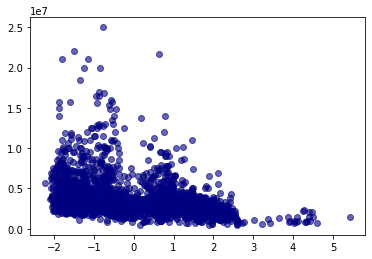

In [289]:
plt.scatter(x=df_v5['pca(best_2)'], y=df_v5['Цена'], c='navy', alpha=0.6)
plt.show()

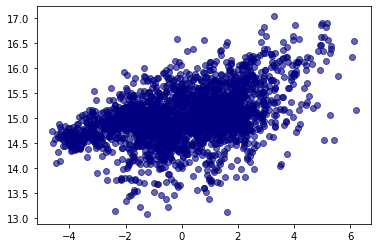

In [290]:
plt.scatter(x=df_v5['pca(best_1)'], y=df_v5['LN(Цена)'], c='navy', alpha=0.6)
plt.show()

In [291]:
from pyod.models.knn import KNN

In [292]:
#Полная
X = df_v5[['LN(Цена)', 'pca(best_1)']]

In [293]:
clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [294]:
Y_train_pred = clf.labels_

In [295]:
Y_train_scores = clf.decision_scores_

In [296]:
Y_train_scores

array([0.07640214, 0.0668774 , 0.05416661, ..., 0.04486331, 0.0802962 ,
       0.10615356])

In [297]:
v = Y_train_pred

In [298]:
v.sum()

240

In [299]:
X.insert(2, "выбросы_метки", v)
X

,LN(Цена),pca(best_1),выбросы_метки
0,14.862830,-0.209829,0
1,14.557448,-0.475365,0
2,14.897316,-0.987612,0
3,15.308415,0.822086,0
4,15.498199,-1.227227,0
...,...,...,...
2394,14.578417,-3.523809,0
2395,15.221203,-2.010801,0
2396,15.114071,0.908666,0
2397,14.580978,0.616155,0


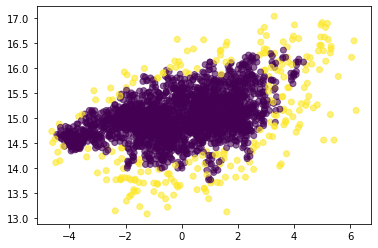

In [300]:
plt.scatter(x=X['pca(best_1)'], y=X['LN(Цена)'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

In [301]:
df_v5['выбросы_метки'] = v
df_v5

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2),выбросы_метки
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.209829,-0.597379,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.475365,1.678944,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.987612,-1.194193,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.822086,-0.944709,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.227227,-0.906802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-3.523809,0.579136,0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-2.010801,-1.497159,0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.908666,-0.424411,0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.616155,1.615245,0


In [302]:
df_i = df_v5.copy()

In [303]:
df_i = df_i.loc[df_i['выбросы_метки'] == 0]
len(df_i)

2159

In [308]:
X = df_i[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

Y = df_i['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 15, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.799
Test R2 0.764
MAE train: 0.1
MAE test: 0.2


In [309]:
#Частичная
df_v5 = df_1.copy()
len(df_v5)

2399

In [310]:
dff = df_v5[['LN(Общая площадь)', 'Хронологический возраст', 
             'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
             'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_2 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.16869862]


In [311]:
df_v5.insert(36, "pca(best_2)", df_pca_2)
df_v5

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_2)
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.597379
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.678944
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.194193
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.944709
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.906802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.579136
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.497159
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.424411
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.615245


In [312]:
X = df_v5[['LN(Цена)', 'pca(best_2)']]

In [313]:
clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [314]:
Y_train_pred = clf.labels_

In [315]:
v = Y_train_pred

In [316]:
v.sum()

240

In [317]:
X.insert(2, "выбросы_метки", v)
X

,LN(Цена),pca(best_2),выбросы_метки
0,14.862830,-0.597379,0
1,14.557448,1.678944,0
2,14.897316,-1.194193,0
3,15.308415,-0.944709,0
4,15.498199,-0.906802,0
...,...,...,...
2394,14.578417,0.579136,0
2395,15.221203,-1.497159,0
2396,15.114071,-0.424411,0
2397,14.580978,1.615245,0


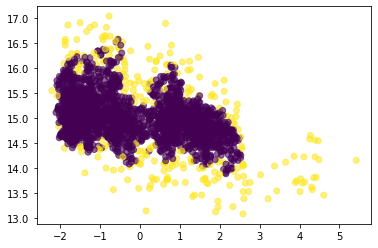

In [319]:
plt.scatter(x=X['pca(best_2)'], y=X['LN(Цена)'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

In [320]:
df_v5['выбросы_метки'] = v
df_v5

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_2),выбросы_метки
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.597379,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.678944,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.194193,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.944709,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.906802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.579136,0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.497159,0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.424411,0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.615245,0


In [321]:
df_i = df_v5.copy()

In [322]:
df_i = df_i.loc[df_i['выбросы_метки'] == 0]
len(df_i)

2159

In [323]:
X = df_i[['LN(Общая площадь)', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
          'евро', 'косметический', 'требует ремонта']]

Y = df_i['LN(Цена)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(algorithm = 'auto', 
                          #leaf_size = 5, 
                          metric = 'minkowski',
                          #metric_params=None, 
                          #n_jobs=None, 
                          n_neighbors = 15, #n_neighbors количество ближайших соседей, используемых для предсказания
                          p = 1,
                          weights = 'uniform')  # weights='distance' и 'uniform'

knn.fit(X_train, Y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')

print(f'MAE train: {mae(Y_train, pred_train):.1f}')
print(f'MAE test: {mae(Y_test, pred_test):.1f}')

Train R2 0.612
Test R2 0.515
MAE train: 0.2
MAE test: 0.2


<font size = 3><div style="text-align: justify">**Вывод по выборке 5:**</div></font>

Алгоритм KNN для выявления выбросов не привел к улучшению модели.

<font size = 3><div style="text-align: justify">**Вывод:**</div></font>

В данном случае для модели KNN важно количество данных и количество факторов. При уменьшении данных и факторов, качество модели падает.
Наилучший резальтат получен на полных данных (без исключения выбросов) с учетом стандартизации (StandardScaler) и логарифмирования цены и общей площади, на обучении R2 = 0,823, на тесте = 0,792. Данный результат сопоставим с регрессией. Алгоритм KNN не дал лучшей подели по отношению к регрессии.